In [1]:
import numpy as np
import seaborn as sns

In [2]:
ex='''30373
25512
65332
33549
35390'''

In [3]:
mat = np.array([list(map(int,list(cols))) for cols in  ex.split('\n')])

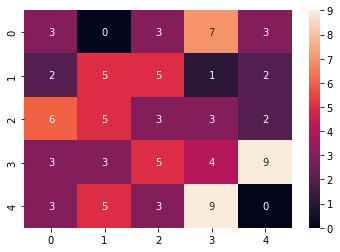

In [4]:
sns.heatmap(mat, annot=True)

In [5]:
with open('../data/in8.txt','r') as f:
    lines = f.read()
mat = np.array([list(map(int,list(cols))) for cols in lines.split('\n')])

In [6]:
mat

array([[0, 1, 2, ..., 3, 0, 1],
       [2, 0, 0, ..., 2, 3, 2],
       [0, 1, 2, ..., 2, 0, 2],
       ...,
       [3, 2, 1, ..., 1, 0, 1],
       [3, 2, 1, ..., 3, 3, 1],
       [2, 3, 1, ..., 0, 3, 0]])

In [7]:
# mat = np.array([list(map(int,list(cols))) for cols in  ex.split('\n')])

In [8]:
v_count=0
for row in range(mat.shape[0]):
    for col in range(mat.shape[1]):
        
        other_trees = [mat[:row,col],  mat[row+1:,col], mat[row, :col], mat[row, col+1:]]
        far_edge = (mat.shape[0] - 1 )
        if (row in [0, far_edge]) or (col in [0, far_edge]):
            v_count+=1
        else:
            visible = any([all(np.greater(mat[row,col], dir_tree)) for dir_tree in other_trees])
            v_count+=visible

In [9]:
v_count

1693

In [10]:
def calc_score_side(tree, side):    
    if all(np.greater(tree, side)):
        result = len(side)
    else:
        result = np.argmax(~np.greater(tree, side))+1

    return result


tree_scores = []
for row in range(mat.shape[0]):
    for col in range(mat.shape[1]):
        tree = mat[row,col]
        far_edge = (mat.shape[0] - 1 )

        if not (row in [0, far_edge]) or (col in [0, far_edge]):

            other_trees = [mat[:row,col][::-1],  mat[row+1:,col], mat[row, :col][::-1], mat[row, col+1:]]
            tree_score = np.prod([calc_score_side(tree, dir_tree) for dir_tree in other_trees])

            tree_scores.append(tree_score)
        else:
            tree_scores.append(0)

In [11]:
max(tree_scores)

422059